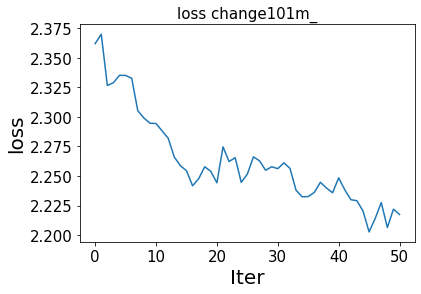

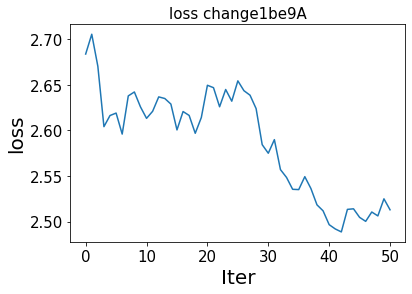

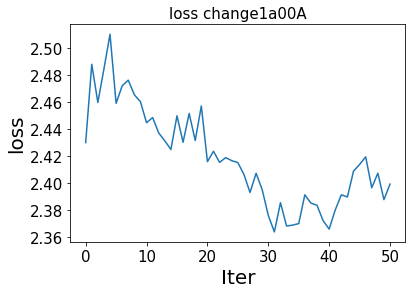

In [61]:
import numpy as np
import re 
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']

file_name1 = "result.example1_cpu.log"
file_name2 = "result.example2_cpu.log"
file_name3 = "result.example3_cpu.log"
file_name4 = "result.example4_cpu.log"

pdb_name = ['101m_','1be9A','1a00A']

def get_info(file_name):
    n_list = []
    loss_list = []
    time_list =[]
    RMSD_list=[]
    with open(file_name,'r') as t:
        lines = t.readlines()
        for line in lines:
            line = line.strip()
            #print(line[:10])
            if line[:10]=='iter_resul':
                matchOBJ = re.match("iter_result:(.*) ,opi_loss(.*) time_cost (.*)s RMSD:(.*)",line,re.M|re.I)
                group1= matchOBJ.group(1)
                group2= matchOBJ.group(2)
                group3= matchOBJ.group(3)
                group4= matchOBJ.group(4)
                n_list.append(group1)
                loss_list.append(float(group2))
                RMSD_list.append(float(group4))
                #print(int(group1),group2,group3,group4)
    return loss_list

loss_list1 = get_info(file_name1)
loss_list2 = get_info(file_name2)
loss_list3 = get_info(file_name3)
#loss_list4 = get_info(file_name4)

def plot_(a,b):

    plt.yticks(fontsize=15,color='#000000')
    plt.xticks(fontsize=15,color='#000000')
    plt.xlabel("Iter",fontsize=20)
    plt.ylabel("loss",fontsize=20)
    plt.title("loss change"+b,size = 15)
    plt.plot(a)
    plt.savefig("loss_change"+b+".jpg",dpi=600)
    plt.show()


plot_(loss_list1,'101m_')
plot_(loss_list2,'1be9A')
plot_(loss_list3,'1a00A')
#plot_(loss_list4)